[View in Colaboratory](https://colab.research.google.com/github/cmajorsolo/blogScripts/blob/master/LSTM_and_random_walk_in_crypto_currency_market.ipynb)

In [1]:
!pip3 install lxml

In [2]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import lxml

bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="
                                   +time.strftime("%Y%m%d"))[0]
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
bitcoin_market_info.loc[bitcoin_market_info['Volume']=='-', 'Volume']=0
bitcoin_market_info['Volume']=bitcoin_market_info['Volume'].astype('int64')
bitcoin_market_info.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-08-12,6283.65,6409.85,6237.50,6322.69,5665250000,108106451582
1,2018-08-11,6185.79,6455.74,6109.03,6295.73,4047850000,106409456302
2,2018-08-10,6571.42,6591.26,6124.52,6184.71,4528680000,113028788092
3,2018-08-09,6305.56,6625.73,6249.07,6568.23,4267040000,108444366975
4,2018-08-08,6746.85,6746.85,6226.22,6305.80,5064430000,116020470612


In [3]:
eth_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
eth_market_info = eth_market_info.assign(Date=pd.to_datetime(eth_market_info['Date']))
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
eth_market_info.columns = eth_market_info.columns.str.replace("*", "")
# look at the first few rows
eth_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-08-12,320.82,328.59,318.60,319.57,1625420000,32489149687
1,2018-08-11,334.26,334.26,308.49,322.11,1790370000,33843432717
2,2018-08-10,365.78,367.05,329.59,334.18,1699400000,37026418724
3,2018-08-09,356.97,370.95,353.61,365.59,1616610000,36127750164
4,2018-08-08,379.89,380.67,353.73,356.61,2016080000,38439767874


In [0]:
import sys
from PIL import Image
import io
import urllib

bt_img = urllib.request.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
eth_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")

image_file = io.BytesIO(bt_img.read())
bitcoin_im = Image.open(image_file)

image_file = io.BytesIO(eth_img.read())
eth_im = Image.open(image_file)
width_eth_im , height_eth_im  = eth_im.size
eth_im = eth_im.resize((int(eth_im.size[0]*0.8), int(eth_im.size[1]*0.8)), Image.ANTIALIAS)

In [0]:

bitcoin_market_info.columns =[bitcoin_market_info.columns[0]]+['bt_'+i for i in bitcoin_market_info.columns[1:]]
eth_market_info.columns =[eth_market_info.columns[0]]+['eth_'+i for i in eth_market_info.columns[1:]]

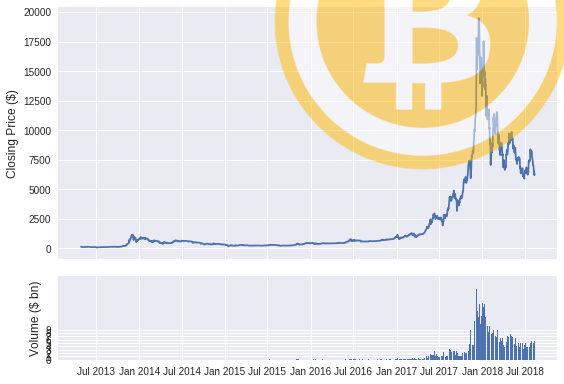

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime),bitcoin_market_info['bt_Open*'])
ax2.bar(bitcoin_market_info['Date'].astype(datetime.datetime).values, bitcoin_market_info['bt_Volume'].values)
fig.tight_layout()
fig.figimage(bitcoin_im, 100, 120, zorder=3,alpha=.5)
plt.show()

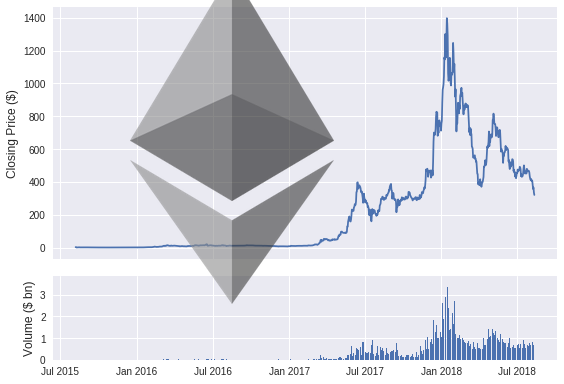

In [7]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks = ([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013, 2019) for j in [1, 7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013, 2019) for j in [1, 7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y') for i in range(2013, 2019) for j in [1, 7]])
ax1.plot(eth_market_info['Date'].astype(datetime.datetime), eth_market_info['eth_Open'])
ax2.bar(eth_market_info['Date'].astype(datetime.datetime).values, eth_market_info['eth_Volume'].values)
fig.tight_layout()
fig.figimage(eth_im, 130, 80, zorder=3, alpha=.6)
plt.show()

In [8]:
market_info = pd.merge(bitcoin_market_info, eth_market_info, on=['Date'])
market_info = market_info[market_info['Date']>='2016-01-01']
# print(market_info)
# for coins in ['bt_', 'eth_']:
kwargs = { 'bt_'+'day_diff': lambda x: (x['bt_'+'Close**']-x['bt_'+'Open*'])/x['bt_'+'Open*']}
market_info = market_info.assign(**kwargs)
kwargs = { 'eth_'+'day_diff': lambda x: (x['eth_'+'Close']-x['eth_'+'Open'])/x['eth_'+'Open']}
market_info = market_info.assign(**kwargs)
market_info.head()

,Date,bt_Open*,bt_High,bt_Low,bt_Close**,bt_Volume,bt_Market Cap,eth_Open,eth_High,eth_Low,eth_Close,eth_Volume,eth_Market Cap,bt_day_diff,eth_day_diff
0,2018-08-12,6283.65,6409.85,6237.50,6322.69,5665250000,108106451582,320.82,328.59,318.60,319.57,1625420000,32489149687,0.006213,-0.003896
1,2018-08-11,6185.79,6455.74,6109.03,6295.73,4047850000,106409456302,334.26,334.26,308.49,322.11,1790370000,33843432717,0.017773,-0.036349
2,2018-08-10,6571.42,6591.26,6124.52,6184.71,4528680000,113028788092,365.78,367.05,329.59,334.18,1699400000,37026418724,-0.058847,-0.086391
3,2018-08-09,6305.56,6625.73,6249.07,6568.23,4267040000,108444366975,356.97,370.95,353.61,365.59,1616610000,36127750164,0.041657,0.024148
4,2018-08-08,6746.85,6746.85,6226.22,6305.80,5064430000,116020470612,379.89,380.67,353.73,356.61,2016080000,38439767874,-0.065371,-0.061281


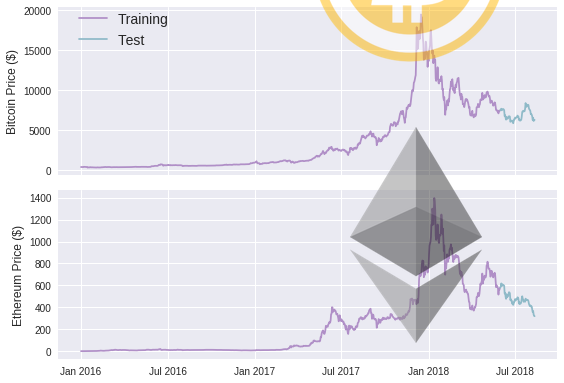

In [9]:
split_date = '2018-06-01'
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013, 2019) for j in [1, 7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013, 2019) for j in [1, 7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y') for i in range(2013, 2019) for j in [1, 7]])
ax1.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime), 
         market_info[market_info['Date'] < split_date]['bt_Close**'], color='#B08FC7', label='Training')
ax1.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['bt_Close**'], color='#8FBAC8', label='Test')
ax2.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] < split_date]['eth_Close'], color='#B08FC7')
ax2.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['eth_Close'], color='#8FBAC8')
ax1.set_xticklabels('')
ax1.set_ylabel('Bitcoin Price ($)', fontsize=12)
ax2.set_ylabel('Ethereum Price ($)', fontsize=12)
plt.tight_layout()
ax1.legend(bbox_to_anchor=(0.03, 1), loc=2, borderaxespad=0., prop={'size':14})
fig.figimage(bitcoin_im.resize((int(bitcoin_im.size[0]*0.65), int(bitcoin_im.size[1]*0.65)), Image.ANTIALIAS), 200, 260, zorder=3, alpha=.5)
fig.figimage(eth_im.resize((int(eth_im.size[0]*0.65), int(eth_im.size[1]*0.65)), Image.ANTIALIAS), 350, 40, zorder=3, alpha=.5)
plt.show()

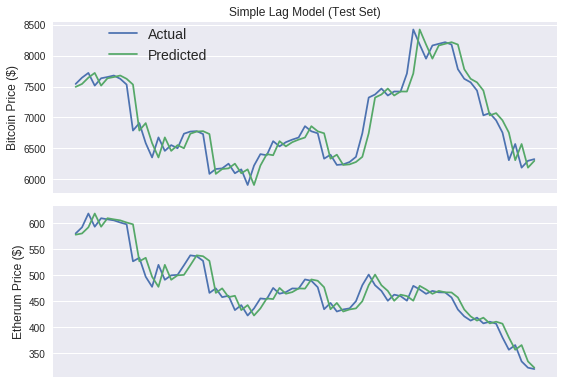

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(2017, i+1, 1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017, i+1, 1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017, i+1, 1).strftime('%b %d %Y') for i in range(12)])
ax1.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime), 
         market_info[market_info['Date'] >= split_date]['bt_Close**'].values, label='Actual')
ax1.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                    datetime.timedelta(days=1)]['bt_Close**'][1:].values, label='Predicted')
ax1.set_ylabel('Bitcoin Price ($)', fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.set_title('Simple Lag Model (Test Set)')
ax2.set_ylabel('Etherum Price ($)',fontsize=12)
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['eth_Close'][1:].values, label='Predicted')
fig.tight_layout()
plt.show()

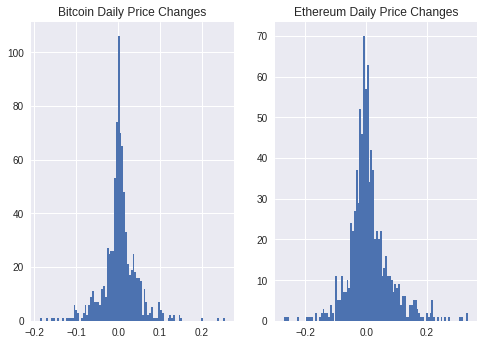

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(market_info[market_info['Date'] < split_date]['bt_day_diff'].values, bins=100)
ax2.hist(market_info[market_info['Date'] < split_date]['eth_day_diff'].values, bins=100)
ax1.set_title('Bitcoin Daily Price Changes')
ax2.set_title('Ethereum Daily Price Changes')
plt.show()

**Random Walk**

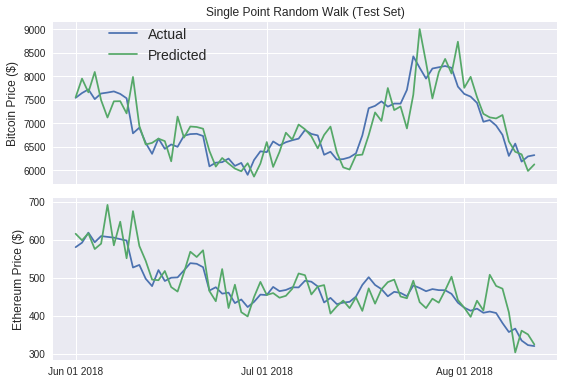

In [12]:
np.random.seed(202)
bt_r_walk_mean = np.mean(market_info[market_info['Date']< split_date]['bt_day_diff'].values)
bt_r_walk_sd = np.std(market_info[market_info['Date']< split_date]['bt_day_diff'].values)
bt_random_steps = np.random.normal(bt_r_walk_mean, bt_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
eth_r_walk_mean = np.mean(market_info[market_info['Date']< split_date]['eth_day_diff'].values)
eth_r_walk_sd = np.std(market_info[market_info['Date']< split_date]['eth_day_diff'].values)
eth_random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(2018,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2018,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2018,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= split_date]['bt_Close**'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['bt_Close**'].values[1:] * 
     (1+bt_random_steps), label='Predicted')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
     (1+eth_random_steps), label='Predicted')
ax1.set_title('Single Point Random Walk (Test Set)')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

Multi-point predictions.

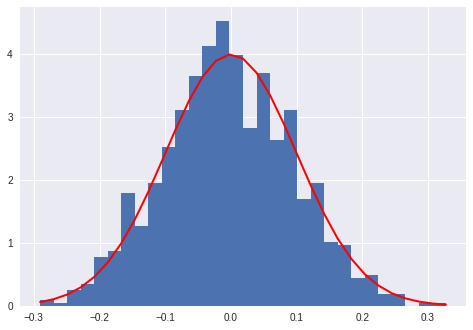

In [13]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)
# print(s)
# print(abs(mu - np.mean(s)) < 0.01)
# print(abs(sigma - np.std(s, ddof=1)) < 0.01)

count, bins, ignored = plt.hist(s, 30, density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2 / (2*sigma**2)), linewidth=2, color='r')
plt.show()

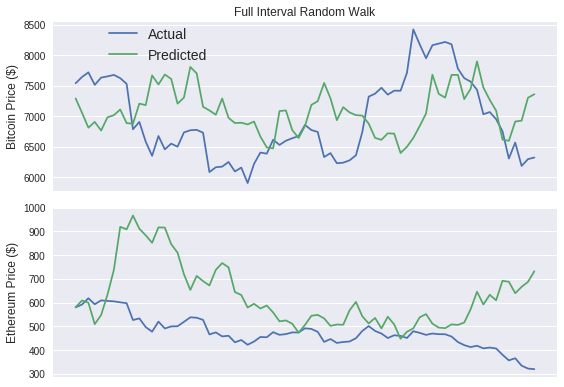

In [14]:
bt_random_walk = []
eth_random_walk = []
for n_step, (bt_step, eth_step) in enumerate(zip(bt_random_steps, eth_random_steps)):
  if n_step==0:
    bt_random_walk.append(market_info[market_info['Date']< split_date]['bt_Close**'].values[0] * (bt_step+1))
    eth_random_walk.append(market_info[market_info['Date']< split_date]['eth_Close'].values[0] * (eth_step+1))
  else:
    bt_random_walk.append(bt_random_walk[n_step-1] * (bt_step+1))
    eth_random_walk.append(eth_random_walk[n_step-1] * (eth_step+1))
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['bt_Close**'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         bt_random_walk[::-1], label='Predicted')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         eth_random_walk[::-1], label='Predicted')
ax1.set_title('Full Interval Random Walk')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

In [0]:
# print(market_info)
for coins in ['bt_', 'eth_']:
  kwargs = {coins + 'close_off_high': lambda x: 2*(x[coins+'High']-x[coins+'Close'])/(x[coins+'High']-x[coins+'Low'])-1, coins+'volatility': lambda x: (x[coins+'High']-x[coins+'Low'])/(x[coins+'Open'])}
  market_info = market_info.rename(columns = {'bt_Open*': 'bt_Open', 'bt_Close**': 'bt_Close'})
  market_info = market_info.assign(**kwargs)

In [17]:
model_data = market_info[['Date']+[coin+metric for coin in ['bt_', 'eth_'] for metric in ['Close', 'Volume', 'close_off_high', 'volatility']]]
model_data = model_data.sort_values(by='Date')
model_data.head()

,Date,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
954,2016-01-01,434.33,36278900,-0.560137,0.020268,0.948024,206062,-0.418477,0.025040
953,2016-01-02,433.44,30096600,0.250597,0.009641,0.937124,255504,0.965898,0.034913
952,2016-01-03,430.01,39633800,-0.173865,0.020827,0.971905,407632,-0.317885,0.060792
951,2016-01-04,433.09,38477500,-0.474265,0.012649,0.954480,346245,-0.057657,0.047943
950,2016-01-05,431.96,34522600,-0.013333,0.010391,0.950176,219833,0.697930,0.025236


In [0]:
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date',1)
test_set = test_set.drop('Date', 1)
window_len = 10
norm_cols = [coin+metric for coin in ['bt_', 'eth_'] for metric in ['Close', 'Volume']]

In [0]:
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1

In [0]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['eth_Close'][window_len:].values/test_set['eth_Close'][:-window_len].values)-1

In [30]:
LSTM_training_inputs[0]

,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
954,0.000000,0.000000,-0.560137,0.020268,0.000000,0.000000,-0.418477,0.025040
953,-0.002049,-0.170410,0.250597,0.009641,-0.011498,0.239937,0.965898,0.034913
952,-0.009946,0.092475,-0.173865,0.020827,0.025190,0.978201,-0.317885,0.060792
951,-0.002855,0.060603,-0.474265,0.012649,0.006810,0.680295,-0.057657,0.047943
950,-0.005457,-0.048411,-0.013333,0.010391,0.002270,0.066829,0.697930,0.025236
949,-0.012019,-0.061645,-0.003623,0.012782,0.002991,0.498534,-0.214540,0.026263
948,0.054613,1.413585,-0.951499,0.069045,-0.006349,2.142074,0.681644,0.040587
947,0.043515,0.570968,0.294196,0.032762,0.040890,1.647747,-0.806717,0.055274
946,0.030576,-0.110282,0.814194,0.017094,0.040937,0.098121,-0.411897,0.019021
945,0.031451,-0.007801,-0.919598,0.017758,0.054014,0.896944,-0.938235,0.025266


In [33]:
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

[[[ 0.00000000e+00  0.00000000e+00 -5.60137457e-01 ...  0.00000000e+00
   -4.18477331e-01  2.50398410e-02]
  [-2.04913315e-03 -1.70410349e-01  2.50596659e-01 ...  2.39937495e-01
    9.65897754e-01  3.49134105e-02]
  [-9.94635415e-03  9.24752404e-02 -1.73864895e-01 ...  9.78200736e-01
   -3.17884625e-01  6.07919610e-02]
  ...
  [ 4.35152994e-02  5.70968249e-01  2.94196131e-01 ...  1.64774679e+00
   -8.06716561e-01  5.52743457e-02]
  [ 3.05758294e-02 -1.10281734e-01  8.14193548e-01 ...  9.81209539e-02
   -4.11896506e-01  1.90207823e-02]
  [ 3.14507402e-02 -7.80067753e-03 -9.19597990e-01 ...  8.96943638e-01
   -9.38235412e-01  2.52659156e-02]]

 [[ 0.00000000e+00  0.00000000e+00  2.50596659e-01 ...  0.00000000e+00
    9.65897754e-01  3.49134105e-02]
  [-7.91343669e-03  3.16886293e-01 -1.73864895e-01 ...  5.95403594e-01
   -3.17884625e-01  6.07919610e-02]
  [-8.07493540e-04  2.78466671e-01 -4.74264706e-01 ...  3.55145125e-01
   -5.76572324e-02  4.79432537e-02]
  ...
  [ 3.26919528e-02  7.2

In [34]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

Using TensorFlow backend.


In [35]:
np.random.seed(202)
eth_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1
eth_history = eth_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)


Epoch 1/50
 - 6s - loss: 0.1340
Epoch 2/50
 - 6s - loss: 0.0891
Epoch 3/50
 - 6s - loss: 0.0816
Epoch 4/50
 - 5s - loss: 0.0785
Epoch 5/50
 - 6s - loss: 0.0733
Epoch 6/50
 - 6s - loss: 0.0703
Epoch 7/50
 - 6s - loss: 0.0698
Epoch 8/50
 - 5s - loss: 0.0675
Epoch 9/50
 - 6s - loss: 0.0690
Epoch 10/50
 - 6s - loss: 0.0659
Epoch 11/50
 - 6s - loss: 0.0639
Epoch 12/50
 - 6s - loss: 0.0653
Epoch 13/50
 - 6s - loss: 0.0633
Epoch 14/50
 - 6s - loss: 0.0615
Epoch 15/50
 - 5s - loss: 0.0630
Epoch 16/50
 - 6s - loss: 0.0632
Epoch 17/50
 - 6s - loss: 0.0630
Epoch 18/50
 - 6s - loss: 0.0615
Epoch 19/50
 - 5s - loss: 0.0626
Epoch 20/50
 - 6s - loss: 0.0628
Epoch 21/50
 - 6s - loss: 0.0609
Epoch 22/50
 - 6s - loss: 0.0616
Epoch 23/50
 - 5s - loss: 0.0624
Epoch 24/50
 - 6s - loss: 0.0612
Epoch 25/50
 - 6s - loss: 0.0607
Epoch 26/50
 - 6s - loss: 0.0647
Epoch 27/50
 - 5s - loss: 0.0617
Epoch 28/50
 - 6s - loss: 0.0599
Epoch 29/50
 - 6s - loss: 0.0609
Epoch 30/50
 - 6s - loss: 0.0640
Epoch 31/50
 - 6s -

In [36]:
print(LSTM_training_inputs.shape)

(872, 10, 8)


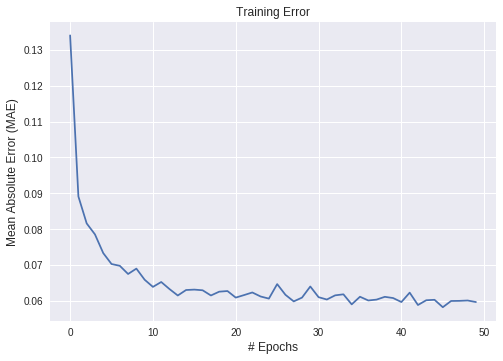

In [38]:
fig, ax1 = plt.subplots(1,1)
ax1.plot(eth_history.epoch, eth_history.history['loss'])
ax1.set_title('Training Error')

if eth_model.loss == 'mae':
  ax1.set_ylabel('Mean Absolute Error (MAE)', fontsize=12)
else:
  ax1.set_ylable('Model Loss', fontsize=12)
ax1.set_xlabel('# Epochs', fontsize=12)
plt.show()

In [0]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013, 2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b, %Y') for i in range(2013, 2019) for j in [1,5,9]])
